# Phần code trực quan độ đo `mAP` và `avg_iou` khi train 2 model `Plate` và `Characters`

## Thông tin nhóm
- 1612406 - Đặng Phương Nam
- 1612423 - Lê Minh Nghĩa

## 1. Code lấy dữ liệu cần thiết

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# Hàm lấy dữ liệu iterations, map và avg_iou từ json sang DataFrame
def covertJsonToDF(nameFile: str):
    f = open(nameFile, 'r')
    data_js = json.load(f)

    scores_df = pd.DataFrame(columns=['iteration','avg_iou','mAP'])

    for data in data_js:
        _iteration = data['iteration']
        _avg_iou = data['avg_iou']
        _map = data['map']
        row = {'iteration': _iteration, 'avg_iou': _avg_iou, 'mAP': _map}

        scores_df = scores_df.append(row, ignore_index=True)

    return scores_df

## 2. Trực quan phần model `plate`

In [3]:
# Lấy dữ liệu cần thiết
plate_train_scores_df = covertJsonToDF('./mAP/plate_train.json')
plate_validation_scores_df = covertJsonToDF('./mAP/plate_validation.json')

# Thêm cột period để phân biệt đâu là dữ liệu của quá trình train và validation
plate_train_scores_df['period'] = 'train'
plate_validation_scores_df['period'] = 'validation'

# Ghép lại thành một Dataframe
plate_scores_df = plate_train_scores_df.append(plate_validation_scores_df, ignore_index=True)

In [4]:
# Xem thử dữ liệu
plate_scores_df

,iteration,avg_iou,mAP,period
0,100.0,0.06,0.000773,train
1,200.0,0.00,0.001633,train
2,300.0,29.96,0.435699,train
3,400.0,32.41,0.611067,train
4,500.0,46.91,0.775169,train
...,...,...,...,...
115,5600.0,94.97,1.000000,validation
116,5700.0,94.69,1.000000,validation
117,5800.0,94.76,1.000000,validation
118,5900.0,94.93,1.000000,validation


**Tìm các giá trị tốt nhất của `best model Plate`**

In [5]:
# Xét tập validation
# Chọn max theo mAP
max_mAP_value = plate_validation_scores_df.mAP.max()

# Lấy DataFrame chứa max_max_value
max_mAP_df = plate_validation_scores_df[plate_validation_scores_df.mAP == max_mAP_value]

# Tiếp tục lấy max theo avg_iou
max_avgIOU_value = max_mAP_df.avg_iou.max()

# Kết quả thu được là DataFrame có max theo mAP trước, rồi tiếp tục có max theo avg_iou
max_mAP_avgIOU_df = max_mAP_df[max_mAP_df.avg_iou == max_avgIOU_value]

# Lấy iteration
iteration = max_mAP_avgIOU_df['iteration'].to_list()[0]

# Xem kết quả
print('Iteration: ' + str(iteration))
print('+ Max mAP = ' + str(max_mAP_value))
print('+ Max avg_iou = ' + str(max_avgIOU_value))

Iteration: 5600.0
+ Max mAP = 1.0
+ Max avg_iou = 94.97


**Tiến hành trực quan**

C:\Users\PHUONG_NAM\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\Users\PHUONG_NAM\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


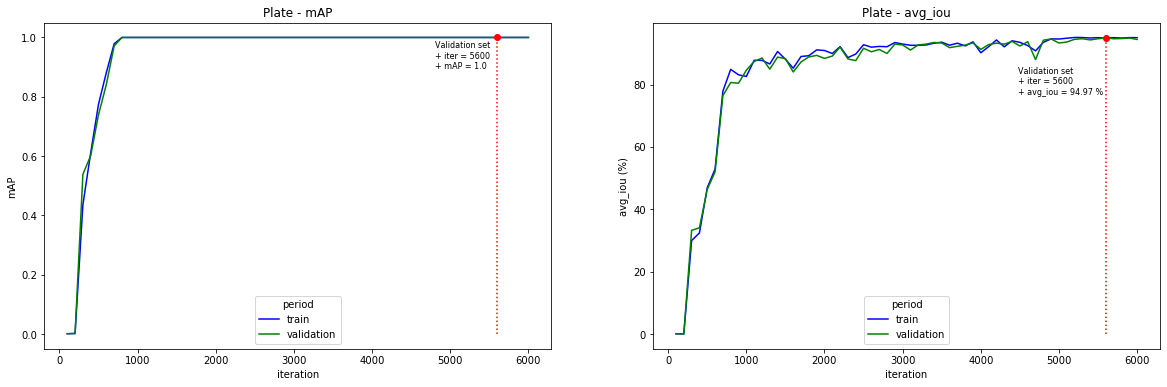

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Phần trực quan của mAP
plate_scores_df.pivot(index='iteration', columns='period', values='mAP').plot(ax=axes[0],
                                                                              figsize=(20,6),
                                                                              color = ['blue', 'green'],
                                                                              title = 'Plate - mAP').set(xlabel='iteration',
                                                                                                              ylabel='mAP')
axes[0].stem([iteration], [max_mAP_value], 'r:', 'ro')
axes[0].text(iteration - 800, max_mAP_value - 0.105, 
             'Validation set \n+ iter = ' + str(int(iteration)) + '\n+ mAP = ' + str(max_mAP_value), 
             fontsize=8)

# Phần trực quan của avg_iou
plate_scores_df.pivot(index='iteration', columns='period', values='avg_iou').plot(ax=axes[1], 
                                                                                  figsize=(20,6),
                                                                                  color = ['blue', 'green'],
                                                                                  title = 'Plate - avg_iou').set(xlabel='iteration',
                                                                                                                      ylabel='avg_iou (%)')
axes[1].stem([iteration], [max_avgIOU_value], 'r:', 'ro')
axes[1].text(iteration - 1120, max_avgIOU_value - 18, 
             'Validation set \n+ iter = ' + str(int(iteration)) + '\n+ avg_iou = ' + str(max_avgIOU_value) + ' % ', 
             fontsize=8)

plt.show()

## 3. Trực quan phần model ` characters`

In [11]:
# Lấy dữ liệu cần thiết
characters_train_scores_df = covertJsonToDF('./mAP/characters_train.json')
characters_validation_scores_df = covertJsonToDF('./mAP/characters_validation.json')

# Thêm cột period để phân biệt đâu là dữ liệu của quá trình train và validation
characters_train_scores_df['period'] = 'train'
characters_validation_scores_df['period'] = 'validation'

# Ghép lại thành một Dataframe
characters_scores_df = characters_train_scores_df.append(characters_validation_scores_df, ignore_index=True)

In [12]:
# Xem thử dữ liệu
characters_scores_df

,iteration,avg_iou,mAP,period
0,300.0,0.00,0.021778,train
1,400.0,25.89,0.095924,train
2,500.0,46.21,0.270213,train
3,600.0,17.47,0.133329,train
4,700.0,29.83,0.437156,train
...,...,...,...,...
165,8300.0,88.73,0.861057,validation
166,8400.0,90.72,0.860941,validation
167,8500.0,86.59,0.860870,validation
168,8600.0,90.12,0.860908,validation


**Tìm các giá trị tốt nhất của `best model Characters`**

In [13]:
# Xét tập validation
# Chọn max theo mAP
max_mAP_value = characters_validation_scores_df.mAP.max()

# Lấy DataFrame chứa max_max_value
max_mAP_df = characters_validation_scores_df[characters_validation_scores_df.mAP == max_mAP_value]

# Tiếp tục lấy max theo avg_iou
max_avgIOU_value = max_mAP_df.avg_iou.max()

# Kết quả thu được là DataFrame có max theo mAP trước, rồi tiếp tục có max theo avg_iou
max_mAP_avgIOU_df = max_mAP_df[max_mAP_df.avg_iou == max_avgIOU_value]

# Lấy iteration
iteration = max_mAP_avgIOU_df['iteration'].to_list()[0]

# Xem kết quả
print('Iteration: ' + str(iteration))
print('+ Max mAP = ' + str(max_mAP_value))
print('+ Max avg_iou = ' + str(max_avgIOU_value))

Iteration: 6900.0
+ Max mAP = 0.861099
+ Max avg_iou = 89.55


**Tiến hành trực quan**

C:\Users\PHUONG_NAM\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\Users\PHUONG_NAM\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


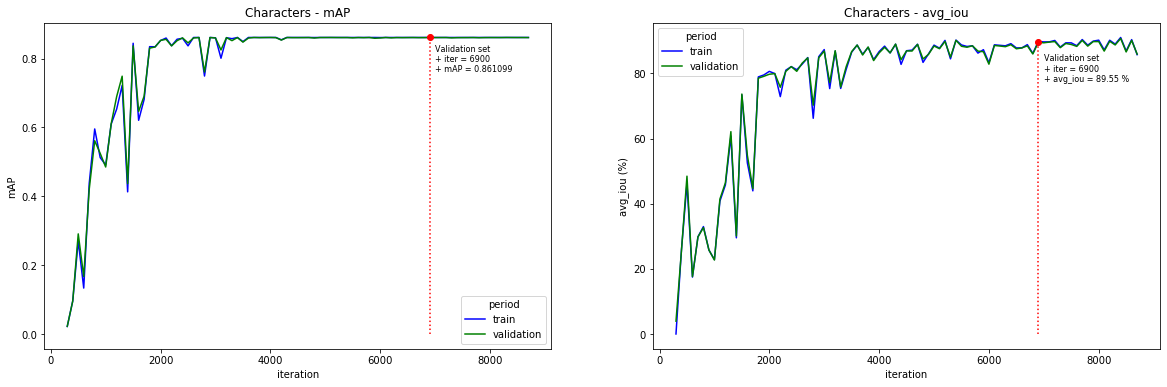

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Phần trực quan của mAP
characters_scores_df.pivot(index='iteration', columns='period', values='mAP').plot(ax=axes[0],
                                                                              figsize=(20,6),
                                                                              color = ['blue', 'green'],
                                                                              title = 'Characters - mAP').set(xlabel='iteration',
                                                                                                              ylabel='mAP')
axes[0].stem([iteration], [max_mAP_value], 'r:', 'ro')
axes[0].text(iteration + 100, max_mAP_value - 0.1, 
             'Validation set \n+ iter = ' + str(int(iteration)) + '\n+ mAP = ' + str(max_mAP_value), 
             fontsize=8)

# Phần trực quan của avg_iou
characters_scores_df.pivot(index='iteration', columns='period', values='avg_iou').plot(ax=axes[1], 
                                                                                  figsize=(20,6),
                                                                                  color = ['blue', 'green'],
                                                                                  title = 'Characters - avg_iou').set(xlabel='iteration',
                                                                                                                      ylabel='avg_iou (%)')
axes[1].stem([iteration], [max_avgIOU_value], 'r:', 'ro')
axes[1].text(iteration + 100, max_avgIOU_value - 12, 
             'Validation set \n+ iter = ' + str(int(iteration)) + '\n+ avg_iou = ' + str(max_avgIOU_value) + ' %', 
             fontsize=8)

plt.show()